In [1]:
%load_ext autoreload
%autoreload 2
from pyroam import RoamGraph

In [2]:
import datetime as dt
ROAM_EXPORT_PATH = "~/Github/roam_backup/json/second_brain.json"
db = RoamGraph.from_path(ROAM_EXPORT_PATH)

TODO
- docvec with spacy
- print out fancy html style including parent breadcrumb blocks
- Implement map, reduce, and filter. Or re

In [11]:
import wordcloud

ModuleNotFoundError: No module named 'wordcloud'

## Unsupported queries

### Top 10 page references used in the last 2 days

In [7]:
from functools import reduce
from collections import Counter
import datetime as dt

In [8]:
two_days_ago = dt.datetime.now() - dt.timedelta(7)
blocks = db.query_many(lambda b: (b.create_time >= two_days_ago)&(":" not in b.to_string()))

In [9]:
tags = reduce(lambda x,y: x+y, [b.get_tags(inherit=False) for b in blocks])
counter = Counter(tags)

In [14]:
import pandas as pd

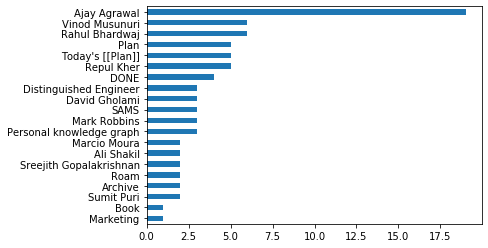

In [28]:
tags, count = list(zip(*counter.most_common()[:20]))
s = pd.Series(count[::-1], index=tags[::-1])
s.plot.barh()

In [10]:
counter.most_common()[:10]

[('Ajay Agrawal', 19),
 ('Vinod Musunuri', 6),
 ('Rahul Bhardwaj', 6),
 ('Plan', 5),
 ("Today's [[Plan]]", 5),
 ('Repul Kher', 5),
 ('DONE', 4),
 ('Distinguished Engineer', 3),
 ('David Gholami', 3),
 ('SAMS', 3)]

### What were the questions I was asking?

In [39]:
from IPython.core.display import display, HTML
import os
with open("style.css") as f:
    style = "<style>%s</style>" % f.read()

In [44]:
question_blocks = [b for b in blocks if "Question" in b.get_tags(inherit=False)]
for b in question_blocks:
    display(HTML(style + b.to_html()))

### How much did my writing about "Life logging" vary over the last month?